## 실제 데이터로 만들어 보는 모델
### 1. 데이터 파악하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

df = pd.read_csv("C:\강의 교안\딥러닝\house_train.csv")

df

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
#데이터 유형 확인
pd.set_option('display.max_rows', ) #최대 줄수(max_row)제한을 없애기
df.dtypes



Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## 2. 결측치, 카테고리 변수 처리하기

In [3]:
#속성별로 결측치가 몇 개인지 확인
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

In [4]:
#카테고리형 변수를 0과 1로 이루어진 변수로 바꾸기 (One_HOt Encoding)
#머신러닝, 딥러닝은 수학 계산을 기반 -> '글자'(object, category)를 넣으면 에러가 발생 -> 0과 1로 된 '더미 변수'로 변환
#df에 있는 숫자가 아닌 것은 0과 1로 된 더미 변수로 쪼개주고 변환된 결과를 다시 df 변수에 덮어씀
df= pd.get_dummies(df)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


## 3. 속성별 관련도 추출하기

In [5]:
#데이터 사이의 상관관계를 저장
df_corr = df.corr()
#집 값과 관련이 큰 것부터 순서대로 저장
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)
#집 값과 상관관계가 가장 큰 10개의 속성 출력
df_corr_sort['SalePrice'].head(10)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

In [6]:
pd.set_option('display.max_rows', None) 
df.columns
print(list(df.columns))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Bl

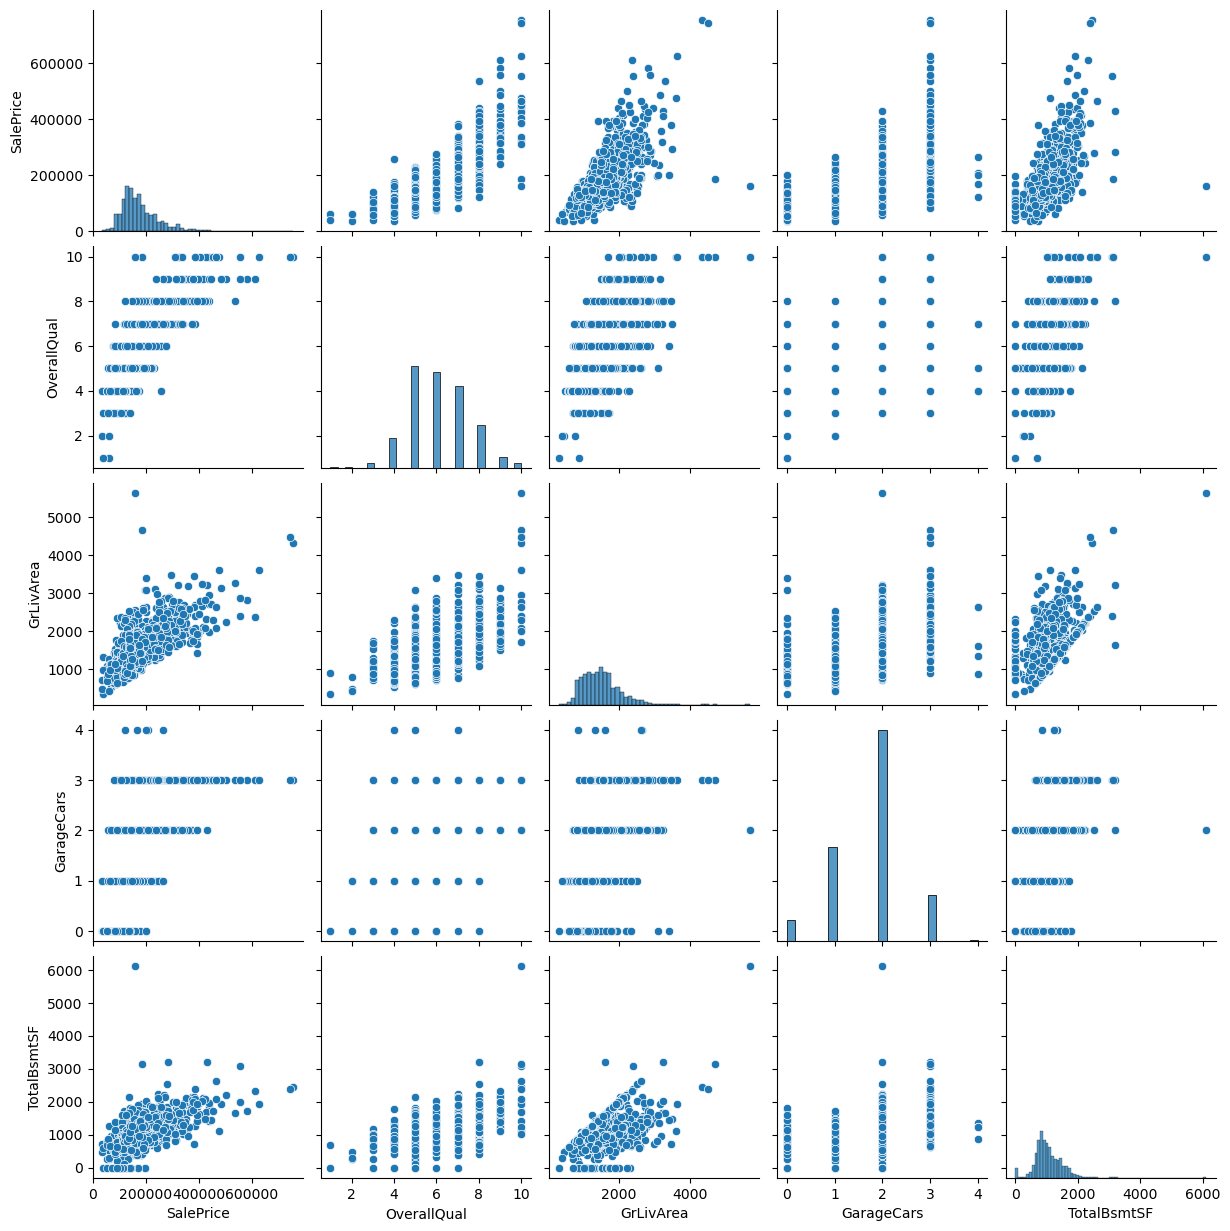

In [ ]:
#집 값과 관련도가 가장 높은 속성들을 추출해서 상관도 그래프 그리기 
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(df[cols]) 
#전체 데이터에서 위에서 뽑은 5개 열만 뽑음 
#5개의 변수를 가지고 각각의 변수들과의 상관도를 보여줌 
plt.show()

## 4. 주택 가격 예측 모델

In [8]:
#집 값을 제외한 나머지 열을 저장
cols_train =['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
X_train_pre =df[cols_train]

#집 값을 저장
Y=df['SalePrice'].values

In [10]:
# 전체의 80%를 학습 데이터로, 20%를 테스트 데이터로
pd.set_option('display.max_rows', 10)
X_train, X_test, Y_train, Y_test = train_test_split(X_train_pre, Y, test_size=0.2)
X_train

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
1359,9,1980,3,770,1980
1143,5,1006,0,0,1006
1405,8,1646,2,482,1594
676,4,1774,3,779,1095
810,6,1309,2,484,1040
...,...,...,...,...,...
655,6,1092,1,264,525
1086,4,1092,1,286,546
531,6,1362,2,502,611
103,7,1226,3,740,1226


In [ ]:
#열(변수 개수)
X_train.shape[1]

5

In [ ]:
#행(데이터 개수)
X_train.shape[0]

1168

In [ ]:
#모델 구조 설정
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))

model.summary()

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,671 (6.53 KB)

 Trainable params: 1,671 (6.53 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#모델 실행
model.compile(optimizer ='adam', loss='mean_squared_error')
#20회 이상 val 결과가 상향되지 않으면 자동으로 중단됨
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
#모델의 이름 설정
modelpath = './data/model/house.keras'
#최적화 모델을 업데이트 하고 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
#실행 관련 설정, 전체의 20%를 검증셋으로 설정 
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 37883244544.0000 - val_loss: 40483430400.0000
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37402087424.0000 - val_loss: 39685021696.0000
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36215627776.0000 - val_loss: 37758914560.0000
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33488982016.0000 - val_loss: 33564436480.0000
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28107778048.0000 - val_loss: 25944907776.0000
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19351963648.0000 - val_loss: 15121511424.0000
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9311577088.0000 - val_loss: 5743243264.0000
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3400047360.0000 - val_loss: 2434912768.0000
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2484291840.0000 - val_loss: 2248368640.0000
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2

In [17]:
X_test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
26,5,900,2,576,900
1265,7,1452,2,506,691
592,5,816,2,816,816
299,6,1152,1,300,1092
678,8,2046,3,834,2046
...,...,...,...,...,...
124,6,1586,2,435,1362
23,5,1060,2,572,1040
761,5,1301,2,440,1145
528,4,605,0,0,528


In [18]:
model.predict(X_test)[:10]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([[140498.33],
       [162564.67],
       [147232.62],
       [146852.19],
       [286449.53],
       [153704.94],
       [297240.75],
       [146063.66],
       [291902.75],
       [186188.8 ]], dtype=float32)

In [20]:
model.predict(X_test).flatten()[:10]

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([140498.33, 162564.67, 147232.62, 146852.19, 286449.53, 153704.94,
       297240.75, 146063.66, 291902.75, 186188.8 ], dtype=float32)

In [ ]:
#예측 값과 실제 값, 실행 번호가 들어갈 빈 리스트를 만듦
real_prices = []
pred_prices = []
X_num=[]

#25개의 샘플을 뽑아 실제 값,, 예측 값을 출력
n_iter = 0 #번호표 초기화 
Y_prediction = model.predict(X_test).flatten() #시험지 X_test를 주고, 답안지 Y_prediction 제출해서 1차원 줄 형태로 출력
for i in range(25): #앞에서부터 25개만 확인
    real = Y_test[i] #실제 정답(해설지)
    prediction = Y_prediction[i] #모델의 예측값(학생 답안)
    print('실제 가격:{:.2f}, 예상가격:{:.2f}'.format(real, prediction))
    
    #바구니에 담기(저장): 확인한 값들을 리스트에 담기
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter +1 
    X_num.append(n_iter)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
실제 가격:134800.00, 예상가격:140498.33
실제 가격:183900.00, 예상가격:162564.67
실제 가격:138000.00, 예상가격:147232.62
실제 가격:158500.00, 예상가격:146852.19
실제 가격:372500.00, 예상가격:286449.53
실제 가격:153500.00, 예상가격:153704.94
실제 가격:276000.00, 예상가격:297240.75
실제 가격:187500.00, 예상가격:146063.66
실제 가격:271900.00, 예상가격:291902.75
실제 가격:185850.00, 예상가격:186188.80
실제 가격:173000.00, 예상가격:174980.58
실제 가격:148000.00, 예상가격:160900.88
실제 가격:130000.00, 예상가격:183469.83
실제 가격:100000.00, 예상가격:125655.66
실제 가격:140000.00, 예상가격:167513.55
실제 가격:258000.00, 예상가격:230020.03
실제 가격:135000.00, 예상가격:138210.39
실제 가격:144152.00, 예상가격:140121.05
실제 가격:184000.00, 예상가격:161244.81
실제 가격:284000.00, 예상가격:315795.41
실제 가격:172500.00, 예상가격:192331.22
실제 가격:110000.00, 예상가격:195572.75
실제 가격:169000.00, 예상가격:198485.45
실제 가격:274900.00, 예상가격:250920.67
실제 가격:465000.00, 예상가격:291175.22


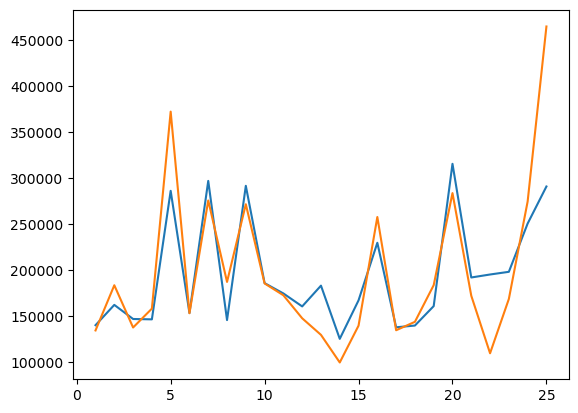

In [ ]:
#그래프를 통해 심플로 뽑은 25개의 값을 비교해 봅니다. 
plt.plot(X_num, pred_prices, label ='predicted price')
plt.plot(X_num, real_prices, label = 'real price')
plt.show()